In [156]:
import numpy as np
import pandas as pd

import sklearn
import sklearn.preprocessing
from sklearn.metrics import log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure
import matplotlib.axes
from sklearn.model_selection import train_test_split

In [131]:
np.random.seed(1432)
sklearn.random.seed(1432)

In [30]:
from sklearn.datasets import load_diabetes, load_wine

X, y = load_wine(return_X_y=True)

In [31]:
X, y = load_wine(as_frame=True, return_X_y=True)

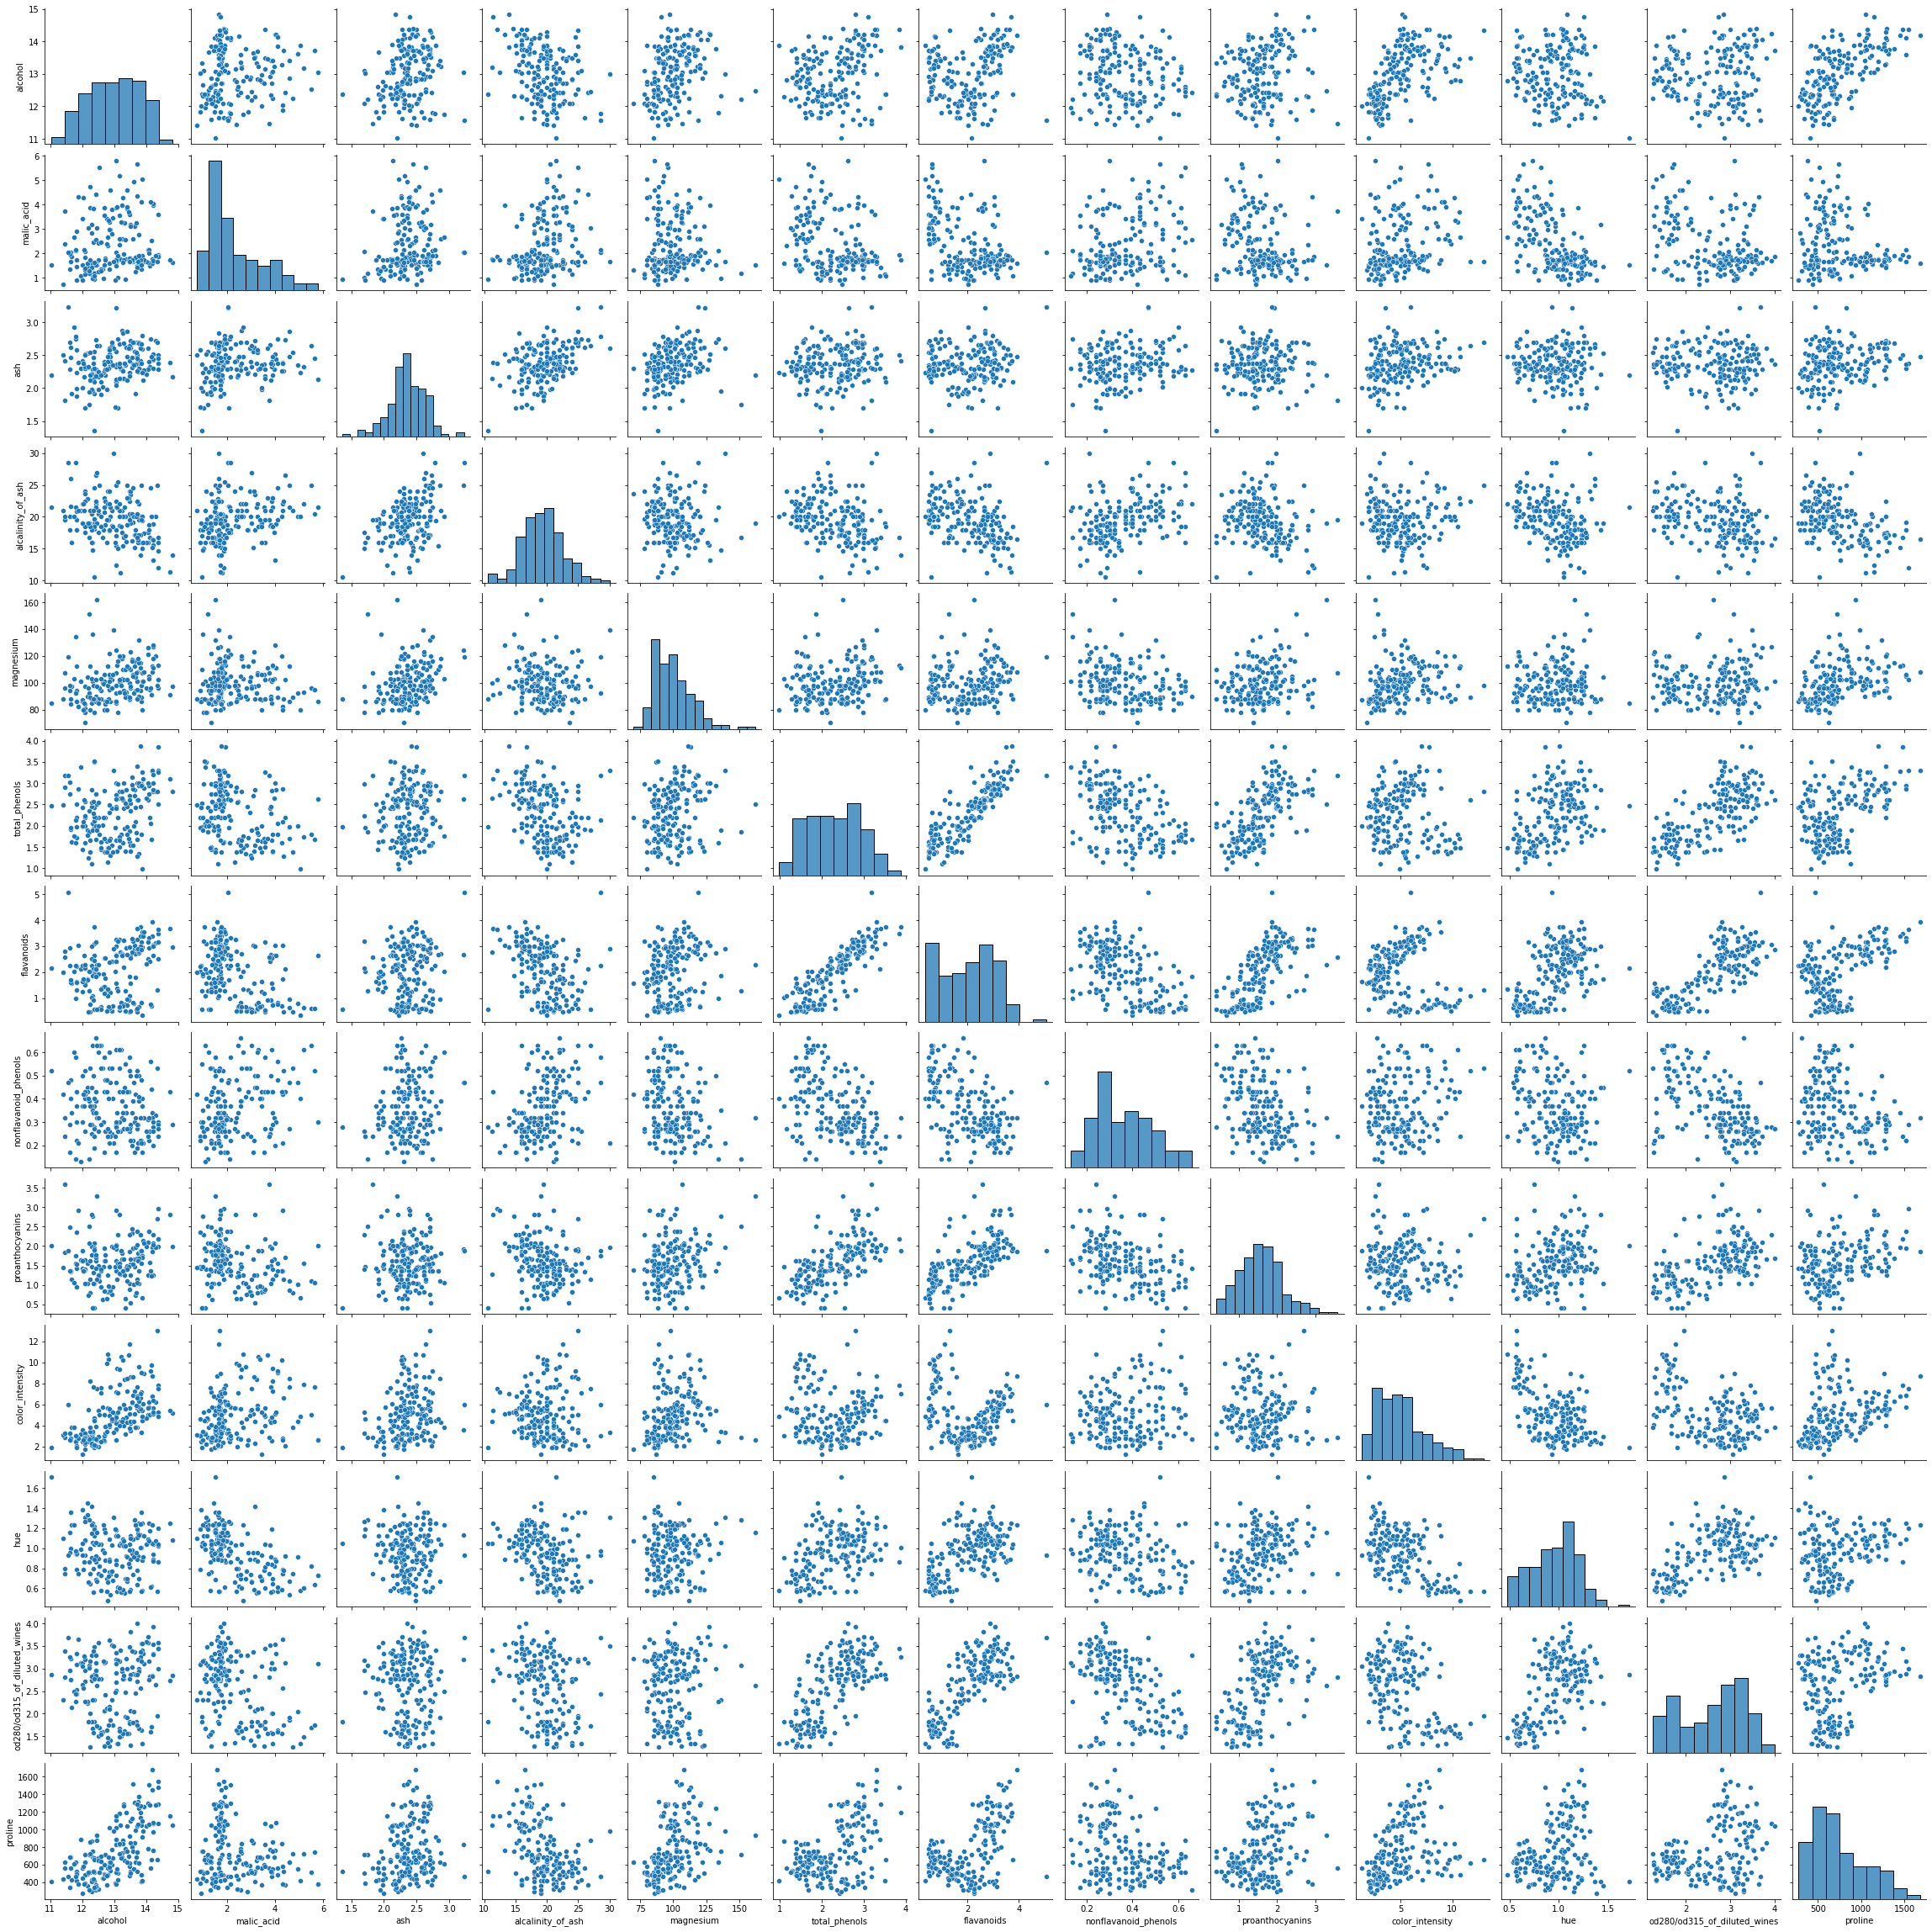

In [34]:
sns.pairplot(X)

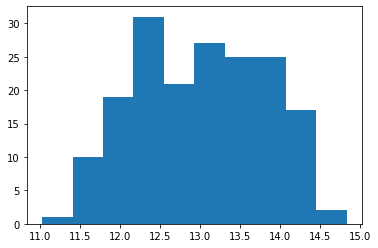

In [113]:
bars, a, b = plt.hist(X['alcohol'])
plt.show()

In [128]:
text_kwargs = dict(fontsize=18, color='black')
def show_distribution(X:pd.DataFrame, column_name:str, axs, title, positionX, positionY):
    bars, _x, _ = axs[positionX, positionY].hist(X[column_name])
    axs[positionX, positionY].set_title(title)
    Mu, sigma = np.round(X[column_name].mean(), 3), np.round(X[column_name].std(), 3)
    y_location = np.percentile(bars, 80)
    x_location = np.percentile(_x, 80)
    axs[positionX, positionY].text(x_location, y_location, (r'$\mu={}$'+'\n'+r'$\sigma={}$')
    .format(Mu, sigma), bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ),**text_kwargs)


In [129]:
N = int(np.round(np.sqrt(len(X.columns))))
N

4

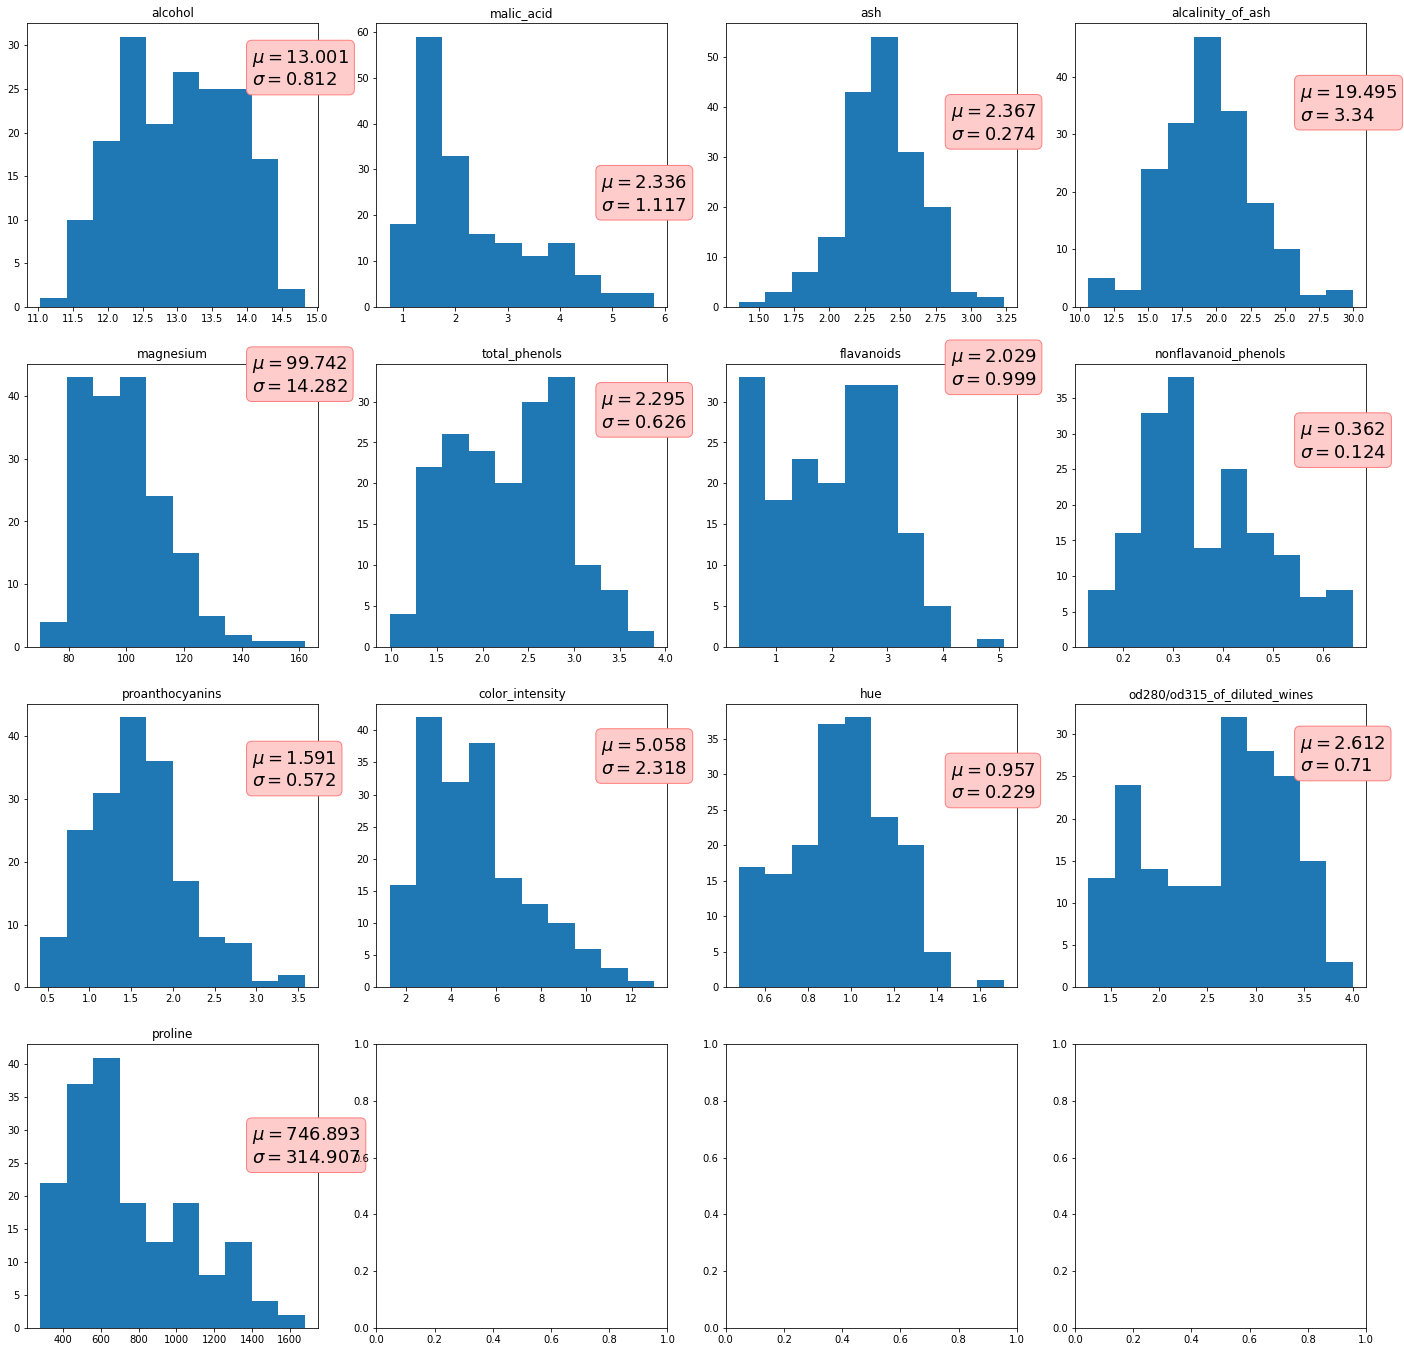

In [130]:
fig, axs = plt.subplots(N,N, figsize=(24,24))
for i, column in enumerate(X.columns):
    show_distribution(X, column, axs, column, i // N, i % N)
plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [136]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [138]:
scaler = StandardScaler()
X_train_standart = scaler.fit_transform(X_train)
X_test_standart = scaler.transform(X_test)

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [149]:
text_kwargs = dict(fontsize=18, color='black')
def show_distribution_np(X, i, axs, title, positionX, positionY):
    bars, _x, _ = axs[positionX, positionY].hist(X[:,i])
    axs[positionX, positionY].set_title(title)
    Mu, sigma = np.round(X[:,i].mean(), 3), np.round(X[:,i].std(), 3)
    y_location = np.percentile(bars, 80)
    x_location = np.percentile(_x, 80)
    axs[positionX, positionY].text(x_location, y_location, (r'$\mu={}$'+'\n'+r'$\sigma={}$')
    .format(Mu, sigma), bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ),**text_kwargs)

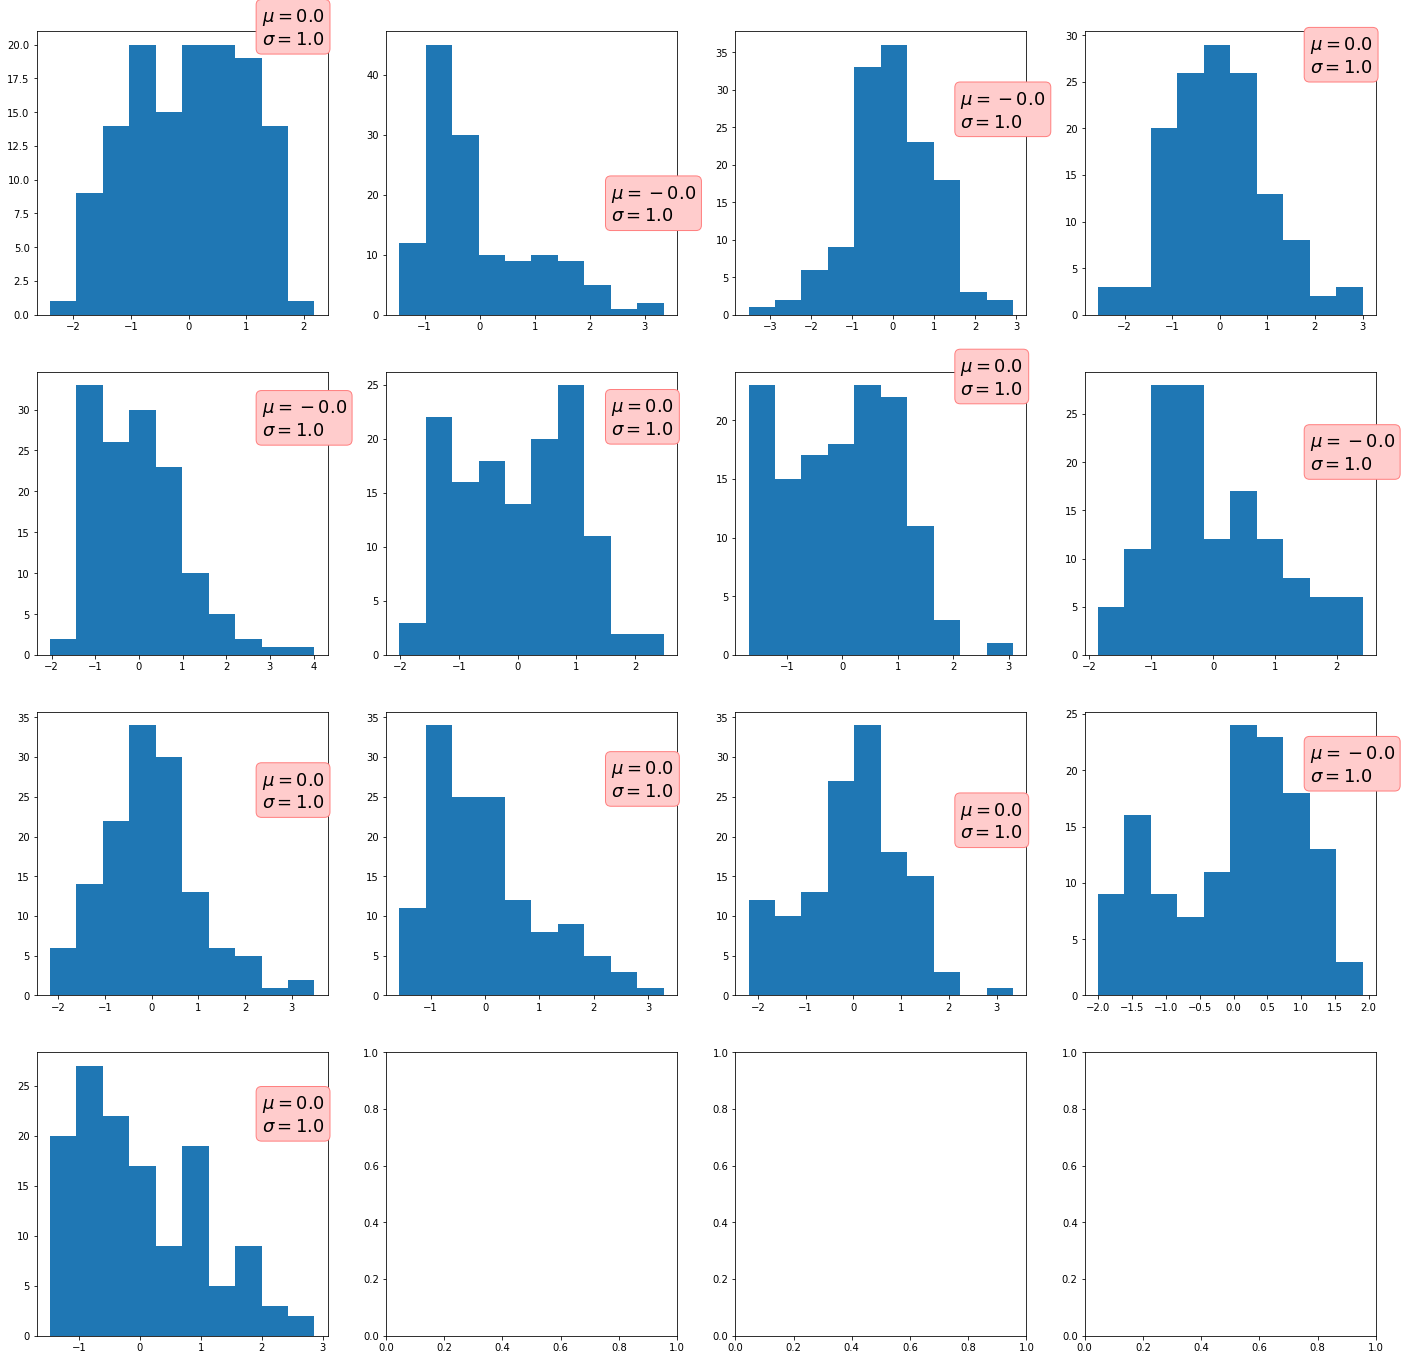

In [154]:
fig, axs = plt.subplots(N,N, figsize=(24,24))
for i in range(len(X_train_standart[0])):
    show_distribution_np(X_train_standart, i, axs, "", i // N, i % N)
plt.show()

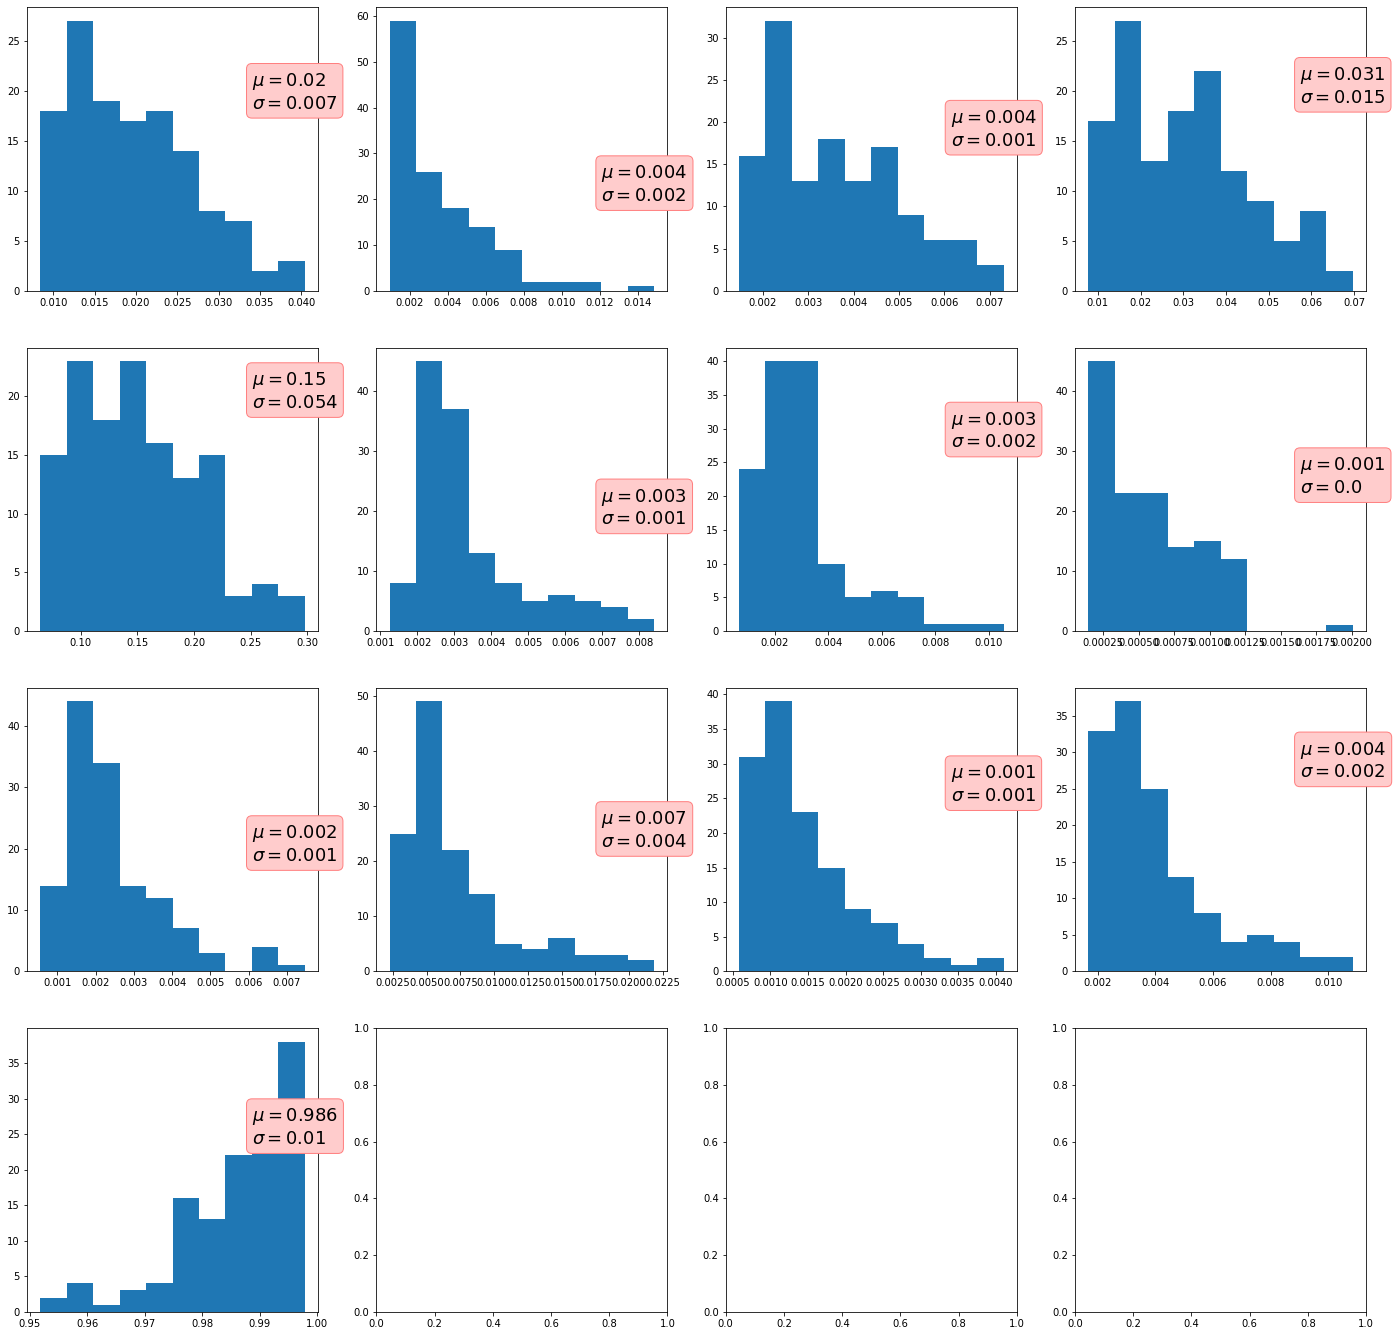

In [155]:
fig, axs = plt.subplots(N,N, figsize=(24,24))
for i in range(len(X_train_normalized[0])):
    show_distribution_np(X_train_normalized, i, axs, "", i // N, i % N)
plt.show()

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1,
       0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2,
       1])

### Время обучаться

In [167]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [181]:
models = {'RF':RandomForestClassifier(), 'GBC':GradientBoostingClassifier()}
sets = {"standart":(X_train_standart, X_test_standart, y_train, y_test), 
"normalized":(X_train_normalized, X_test_normalized, y_train, y_test),
"no_preprocessing":(X_train, X_test, y_train, y_test),
}

results = {}

def train_validate(model, data_set):
    X_train, X_test, y_train, y_test = data_set
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)
    return log_loss(y_test, y_pred,  labels = [0,1,2])


for model in models.keys():
    for data_set in sets.keys():
        results[str(model) + ':'+ str(data_set)] = train_validate(models[model], sets[data_set])

In [182]:
results

{'RF:standart': 0.13862602740733332,
 'RF:normalized': 0.19910911642498857,
 'RF:no_preprocessing': 0.14208088527136484,
 'GBC:standart': 0.10382528834590227,
 'GBC:normalized': 0.46013836586991963,
 'GBC:no_preprocessing': 0.10381694681400876}

## Немножко аналитики

1) Это далеко не полноценное исследование, ибо я даже CV с перебором гиперпараметров не делал
2) Для леса лучше стандартизация, но не особо выигрывает в целом
3) Для бустинга лучше тоже стандартизация, аналогично
4) 2 и 3 в целом ожидаемо, потому что деревьям все равно
5) Нормализация все испортила в обоих случаях, да так, что даже без препроцессинга вышло лучше